# EN3160 Assignment 2 on Fitting and Alignment

## Question 01

Largest blob radius (r): 42.43
Largest blob center (x, y): (234.00, 0.00)


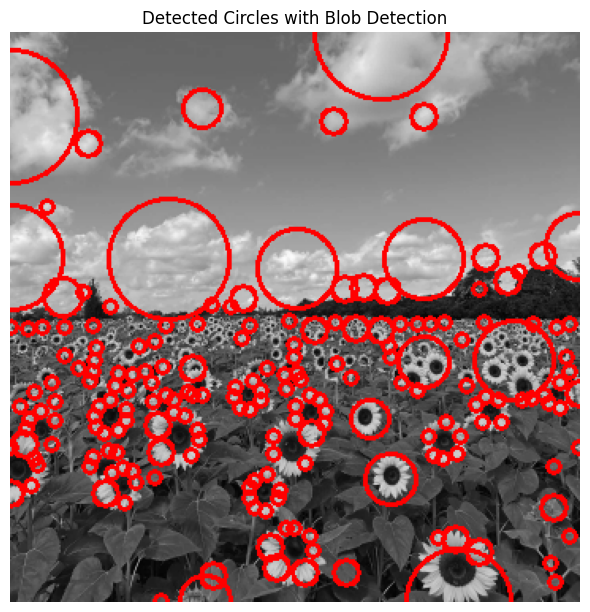

Range of sigma values used for blobs: (4.24, 42.43)


In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import blob_log

# Load image with no color reduction
image = cv.imread('the_berry_farms_sunflower_field.jpeg', cv.IMREAD_REDUCED_COLOR_4)

# Convert image to grayscale in a single step with more explicit error handling
if image is not None:
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
else:
    raise FileNotFoundError("Image file not found.")

# Apply a Gaussian blur (larger kernel and a bit more blur applied)
blurred_image = cv.GaussianBlur(gray_image, (9, 9), 0.1)

# Parameters for blob detection (reduced threshold for detecting more blobs)
min_sigma_val = 3
max_sigma_val = 30
blob_threshold = 0.1

# Detect blobs using Laplacian of Gaussian
blobs_detected = blob_log(blurred_image, min_sigma=min_sigma_val, max_sigma=max_sigma_val, threshold=blob_threshold)

# Adjust radii using a list comprehension
radii = [blob[2] * np.sqrt(2) for blob in blobs_detected]

# Find the largest blob
largest_blob_index = np.argmax(radii)
largest_blob = blobs_detected[largest_blob_index]

# Print the radius and coordinates of the largest detected circle
radius_largest = radii[largest_blob_index]
y_largest, x_largest = largest_blob[:2]
print(f"Largest blob radius (r): {radius_largest:.2f}")
print(f"Largest blob center (x, y): ({x_largest:.2f}, {y_largest:.2f})")

# Create a copy of the grayscale image in three-channel format for drawing
gray_image_colored = cv.cvtColor(gray_image, cv.COLOR_GRAY2BGR)

# Draw all detected blobs as circles using OpenCV
for blob, radius in zip(blobs_detected, radii):
    y_center, x_center = blob[:2]  # Blob format (y, x, radius)
    cv.circle(gray_image_colored, (int(x_center), int(y_center)), int(radius), (0, 0, 255), 2)  # Blue circle

# Display the result with different figure size and tight layout
plt.figure(figsize=(6, 6))
plt.imshow(cv.cvtColor(gray_image_colored, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.tight_layout()
plt.title('Detected Circles with Blob Detection')
plt.show()

# Report the range of sigma (scale) values
print(f"Range of sigma values used for blobs: ({min(radii):.2f}, {max(radii):.2f})")
